In [1]:
# Imports
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import sys
sys.path.append('./NLP')
sys.path.append('./RandomQueryGenerator')
import os
from TranslationToQueryGraph import *
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)

## Play with the HumanMine model trained on 1000000 instances

Sentence (natural language query):
what is primaryidentifier where name >= @constraint_value, firstauthor is @constraint_value in dataset, proteindomain, publication, location, annotatable
Is minimum spanning tree of schema graph connected?: True

==========Obtaining Query Graph for Candidate #1=============
Is query graph connected?: True

==========Obtaining Query Graph for Candidate #2=============
Is query graph connected?: True

==========Obtaining Query Graph for Candidate #3=============
Is query graph connected?: True

==========English from candidate Query Graph #1=============


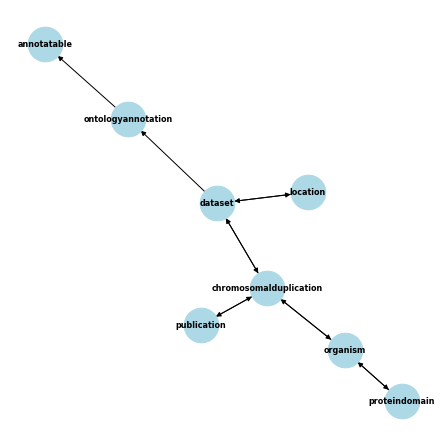

The English generated from the query graph is: give primaryidentifier from dataset, chromosomalduplication, publication, organism, proteindomain, location, ontologyannotation, annotatable such that name >= @constraint_value, firstauthor is @constraint_value

==========English from candidate Query Graph #2=============


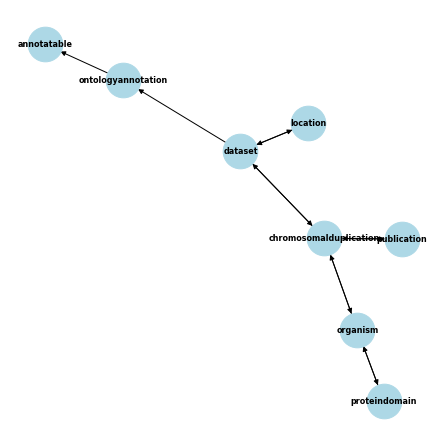

The English generated from the query graph is: show primaryidentifier from dataset, chromosomalduplication, organism, proteindomain, publication, location, ontologyannotation, annotatable such that name >= @constraint_value, firstauthor is @constraint_value

==========English from candidate Query Graph #3=============


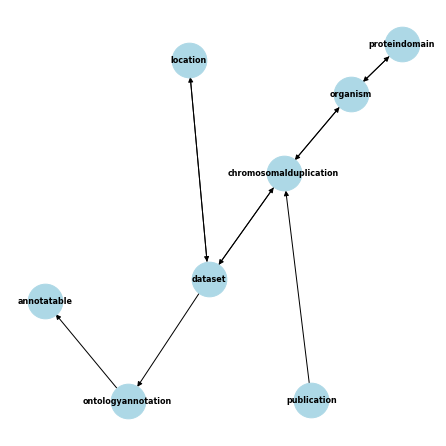

The English generated from the query graph is: give primaryidentifier from publication, chromosomalduplication, dataset, organism, proteindomain, location, ontologyannotation, annotatable such that firstauthor is @constraint_value, name >= @constraint_value


In [2]:
# Load the model
TranslationToQueryGraphObj = TranslationToQueryGraph(translationsOutputDir = "./NLP/Translations/", modelsDir = "./NLP/Models/", schemaDir="./Data/Schemas/HumanMinedbSchema.obj", model="HumanMine-1000000-l12h12-Uniform")

# Parameters for the translation
beam_size = 100 # Number of candidates considered in each branching of the beam search tree
candidates_considered = 3 # Number of candidate translations that will be finally obtained from the model (i.e. if it's 2, you will get 2 queries, if 3, 3 queries, and so on)

# Some example queries (from the test set). The last one is the one used, write your own if you want.
inputSentence = "from ontologyevidence, publication, annotatable, show id with doi greater than @constraint_value, title greater or equal @constraint_value"
inputSentence = "from ontologyevidence, publication, annotatable, show id with doi greater than @constraint_value, title greater or equal @constraint_value"
inputSentence = "what is scoretype, symbol having name at least @constraint_value from dataset, biologicalregion"
inputSentence = "having id > @constraint_value, id equals @constraint_value what is secondaryidentifier from snp, dataset, bioentity, synonym"
inputSentence = "give id with id less or equal @constraint_value, name greater or equal @constraint_value in ontologyterm, ontologyrelation, mammalianphenotypeterm, genotype"
inputSentence = "in ontologyannotation, annotatable, having id = @constraint_value show id"
inputSentence = "in snp, ontologyannotation, what is score"
inputSentence = "show name in disease, publication, author where pubmedid equals @constraint_value"
inputSentence = "with end less or equal @constraint_value give id, score from interaction, bioentity, promoter, location"
inputSentence = "show expressionscore having name less or equal @constraint_value, name lower than @constraint_value in dataset, rnaseqresult, atlasexpression, gene, bioentity"
inputSentence = "what is name from ontologyrelation, organism, sequencefeature, strain, soterm having length at least @constraint_value, annotationversion < @constraint_value"
inputSentence = "what is id from complex, interaction, interactiondetail, interactionexperiment"
inputSentence = "give primaryidentifier in disease, gene, geneflankingregion such that id <= @constraint_value, name equals @constraint_value"
inputSentence = "with name <= @constraint_value, doi greater than @constraint_value what is length, score in promoter, publication, bioentity, synonym"
inputSentence = "from sequencealteration, sequence, give length where id at most @constraint_value, md5checksum less or equal @constraint_value"
inputSentence = "from publication, comment what is description"
inputSentence = "in directrepeat, bioentity, sequencefeature, crossreference, give scoretype, length where scoretype greater or equal @constraint_value, primaryidentifier at most @constraint_value"
inputSentence = "from Protein, gene what is length"
inputSentence = "what is primaryidentifier where name >= @constraint_value, firstauthor is @constraint_value in dataset, proteindomain, publication, location, annotatable"

print("Sentence (natural language query):\n" + inputSentence)

# 1. Obtain predictions from the model
modelPredictions = TranslationToQueryGraphObj.obtainSentenceModelPrediction(inputSentence, n_best=candidates_considered, beam_size=beam_size, modelCheckpoint='5000')

#print("\nModel predictions:")
#print(modelPredictions)
#print("\n")

# 2. Obtain query graphs (number corresponds to n_best) from the model's predictions
queryGraphs = TranslationToQueryGraphObj.obtainQueryGraph(modelPredictions, debug=False)

# 3. Get the English back from each of the query graphs generated
for inx, queryGraph in enumerate(queryGraphs):
    if(isinstance(queryGraph, str)):
        continue
    print("\n==========English from candidate Query Graph #" + str(inx+1) + "=============")
    englishFromQueryGraph = TranslationToQueryGraphObj.getEnglishFromQueryGraph(queryGraph, showGraph=True) # To show the query graph too
